In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account

# Crear una instancia del cliente BigQuery usando el archivo de credenciales JSON
credentials_path = 'C:/Users/NoxiePC/Desktop/henry/driven-atrium-445021-m2-a773215c2f46.json'
client = service_account.Credentials.from_service_account_file(credentials_path)

# Definir las consultas para obtener los dataframes
query_trips = """
SELECT  
    gt.pickup_location_id AS location_id,
    gt.pickup_year AS year,
    gt.pickup_month AS month,
    gt.pickup_day_of_month AS day_of_month,
    gt.pickup_day_of_week AS day_of_week,
    gt.pickup_hour_of_day AS hour_of_day,
    COUNT(*) AS cantidad_de_viajes,
    c.borough
FROM 
    driven-atrium-445021-m2.project_data.trips gt
LEFT JOIN 
    driven-atrium-445021-m2.project_data.coordinates c
ON 
    gt.pickup_location_id = c.location_id
WHERE 
    gt.pickup_location_id NOT IN (264, 265, 1)
GROUP BY 
    gt.pickup_location_id,
    gt.pickup_year,
    gt.pickup_month,
    gt.pickup_day_of_month,
    gt.pickup_day_of_week,
    gt.pickup_hour_of_day,
    c.borough;
"""

query_weather = """
SELECT  
    CASE 
        WHEN location_id = 1 THEN 'Queens'
        WHEN location_id = 2 THEN 'Brooklyn'
        WHEN location_id = 3 THEN 'Manhattan'
        WHEN location_id = 4 THEN 'Bronx'
        WHEN location_id = 5 THEN 'Staten Island'
        ELSE 'Unknown'  
    END AS borough,
    year,
    month,
    day_of_month,
    hour_of_day,
    day_of_week,
    temperature,
    relative_humidity,
    dew_point,
    apparent_temperature,
    weather_code,
    pressure_msl,
    cloud_cover,
    wind_speed,
    wind_direction,
    wind_gusts
FROM 
    driven-atrium-445021-m2.project_data.weather;
"""

# Ejecutar las consultas y almacenar los resultados en DataFrames de pandas
df_trips = bigquery.Client(credentials=client).query(query_trips).result().to_dataframe()
df_weather = bigquery.Client(credentials=client).query(query_weather).result().to_dataframe()

# Verificar los primeros registros de ambos dataframes
print("DataFrame de viajes:")
display(df_trips.head())

print("\nDataFrame de clima:")
display(df_weather.head())

c:\Users\NoxiePC\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1785: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


KeyboardInterrupt: 

In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

# Crear una instancia del cliente BigQuery usando el archivo de credenciales JSON
credentials_path = 'C:/Users/NoxiePC/Desktop/henry/driven-atrium-445021-m2-a773215c2f46.json'
credentials = service_account.Credentials.from_service_account_file(credentials_path)

# Crear el cliente BigQuery con las credenciales
client = bigquery.Client(credentials=credentials, project=credentials.project_id)

# Definir la consulta SQL para acceder a la vista
query_viajes_por_ubicacion_y_tiempo = """
SELECT *
FROM `driven-atrium-445021-m2.project_data.viajes_por_ubicacion_y_tiempo`
"""
query_weather_borough_details = """
SELECT *
FROM `driven-atrium-445021-m2.project_data.weather_borough_details`
"""
query_coordinates = """
SELECT *
FROM driven-atrium-445021-m2.project_data.coordinates
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame de pandas
df_coordinates = client.query(query_coordinates).to_dataframe()
df_clima = client.query(query_weather_borough_details).to_dataframe()
df_viajes = client.query(query_viajes_por_ubicacion_y_tiempo).to_dataframe()

c:\Users\NoxiePC\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1785: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
c:\Users\NoxiePC\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1785: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
c:\Users\NoxiePC\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1785: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [2]:
clima = df_clima

In [3]:
fechas = clima[['year', 'month', 'day_of_month', 'day_of_week', 'hour_of_day']]
fechas = fechas.loc[fechas.index.repeat(261)].reset_index(drop=True)

In [4]:
unique_location_ids = df_viajes['location_id'].unique()
repeated_location_ids = list(unique_location_ids) * (len(fechas) // len(unique_location_ids)) + list(unique_location_ids)[:(len(fechas) % len(unique_location_ids))]

# Agregar la columna 'location_id' a fechas
fechas['location_id'] = repeated_location_ids

In [5]:
viajes = df_viajes

In [6]:
# Combinar los datasets en función de la columna "location_id" 
fechas = pd.merge(fechas, df_coordinates[['location_id', 'borough']], on='location_id', how='left')
resultado = pd.merge(fechas, clima, on=['borough', 'year', 'month', 'day_of_month', 'hour_of_day', 'day_of_week'])

In [7]:
# Combinar los datasets en función de las columnas relevantes
clima_con_viajes = pd.merge(resultado, viajes[['location_id', 'year', 'month', 'day_of_month', 'day_of_week', 'hour_of_day', 'cantidad_de_viajes']],
                            on=['location_id', 'year', 'month', 'day_of_month', 'day_of_week', 'hour_of_day'], 
                            how='left')

# Rellenar los valores nulos en la columna 'cantidad_de_viajes' con ceros utilizando una asignación directa
clima_con_viajes['cantidad_de_viajes'] = clima_con_viajes['cantidad_de_viajes'].fillna(0)


Cross-Validation MSE: 129.30524772755774 ± 12.626092832542755
Mean Squared Error (MSE): 107.22398385044399
Mean Absolute Error (MAE): 5.652019289906179
R² Score: 0.9925643181574633
Importancia de las Características:
location_id             0.581515
hour_of_day             0.207263
day_of_week             0.103121
weather_code            0.015278
wind_gusts              0.015177
cloud_cover             0.014988
temperature             0.013909
apparent_temperature    0.012843
wind_speed              0.012313
day_of_month            0.012191
relative_humidity       0.011402
dtype: float32


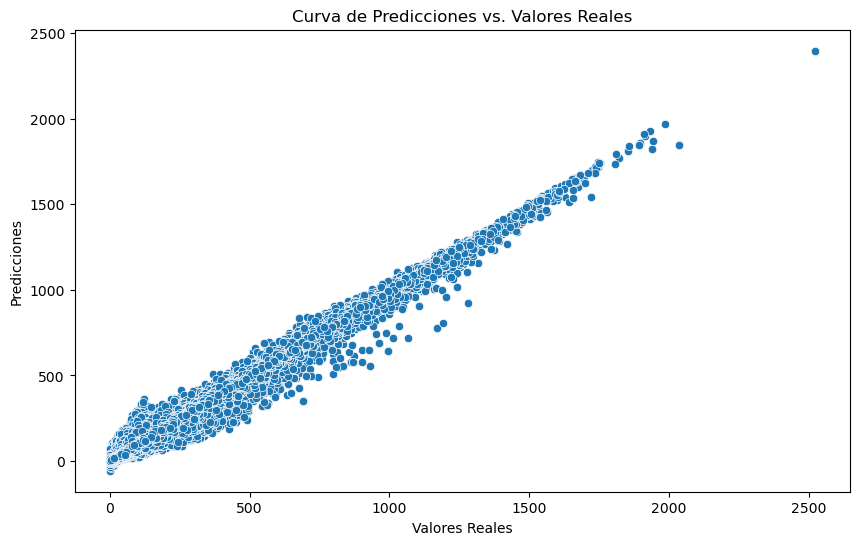

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Variables predictoras (X) y variable objetivo (y)
predictors = [
    'location_id', 'day_of_month','hour_of_day', 'day_of_week',
    'relative_humidity', 'apparent_temperature','temperature', 'weather_code',
    'cloud_cover','wind_speed', 'wind_gusts'
]
X = clima_con_viajes[predictors]
y = clima_con_viajes['cantidad_de_viajes']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean()} ± {scores.std()}")

# Predecir con los datos de prueba
y_pred = model.predict(X_test)


In [22]:
clima_con_viajes.head()

,year,month,day_of_month,day_of_week,hour_of_day,location_id,borough,temperature,relative_humidity,dew_point,apparent_temperature,weather_code,pressure_msl,cloud_cover,wind_speed,wind_direction,wind_gusts,cantidad_de_viajes
0,2023,5,1,0,15,249,Manhattan,14.6,43.0,2.3,9.2,0.0,994.3,18.0,25.2,217.0,54.4,184
1,2023,5,1,0,15,254,Bronx,14.2,46.0,2.7,9.1,0.0,994.4,14.0,23.7,216.0,53.6,155
2,2023,5,1,0,15,237,Manhattan,14.6,43.0,2.3,9.2,0.0,994.3,18.0,25.2,217.0,54.4,360
3,2023,5,1,0,15,238,Manhattan,14.6,43.0,2.3,9.2,0.0,994.3,18.0,25.2,217.0,54.4,228
4,2023,5,1,0,15,258,Queens,14.2,46.0,2.9,8.8,1.0,994.9,48.0,26.3,222.0,50.4,75


In [ ]:
frecuencia_viajes = clima_con_viajes['cantidad_de_viajes'].value_counts()



count          1619.0
mean     12961.334157
std      38104.449769
min               5.0
25%              40.0
50%             325.0
75%            3685.0
max          765185.0
Name: count, dtype: Float64

In [27]:
frecuencia_viajes.quantile(0.9)

38748.00000000001

In [37]:
# Ver la distribución de los valores en 'cantidad_de_viajes'
frecuencia_viajes = clima_con_viajes['cantidad_de_viajes'].value_counts()

# Definir el número máximo de repeticiones permitidas para cada valor
max_repeticiones = 20000  # Puedes ajustar este número según lo necesites

# Lista para almacenar las filas balanceadas
filas_balanceadas = []

# Para cada valor en 'cantidad_de_viajes', reducir la frecuencia si es necesario
for valor, frecuencia in frecuencia_viajes.items():
    # Seleccionamos las filas que corresponden a ese valor
    sub_df = clima_con_viajes[clima_con_viajes['cantidad_de_viajes'] == valor]
    
    # Si la frecuencia excede el máximo permitido, tomamos solo el número deseado de filas
    if frecuencia > max_repeticiones:
        sub_df = sub_df.sample(n=max_repeticiones, random_state=42)  # Aleatorizar las filas
    
    # Añadir al conjunto de filas balanceadas
    filas_balanceadas.append(sub_df)

# Combinar todas las filas balanceadas
clima_viajes_balanceado = pd.concat(filas_balanceadas)


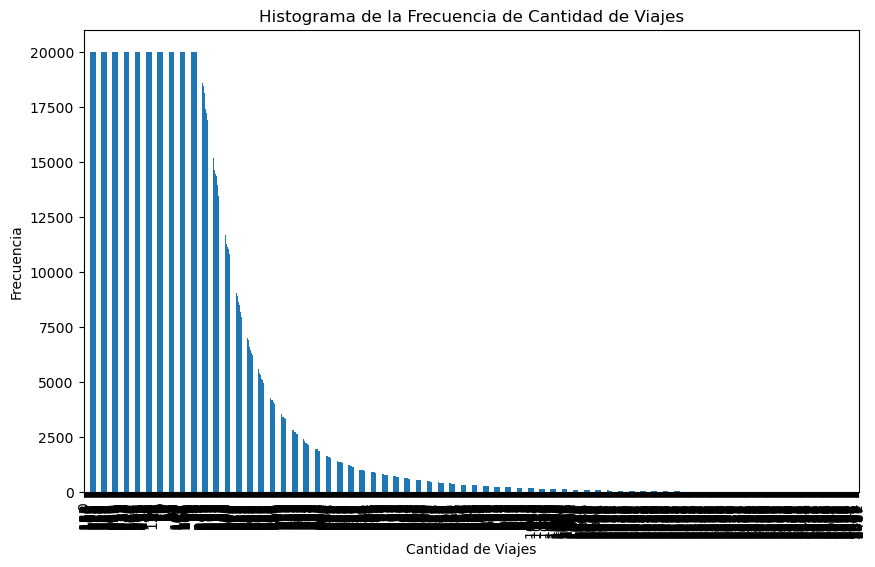

In [38]:
import matplotlib.pyplot as plt
frecuencia_viajes2 = clima_viajes_balanceado['cantidad_de_viajes'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 6))
frecuencia_viajes2.plot(kind='bar')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Frecuencia de Cantidad de Viajes')
plt.show()


In [43]:
import numpy as np

clima_viajes_balanceado = clima_con_viajes
# Suponiendo que 'clima_viajes_balanceado' es un DataFrame de pandas
# Añadir una columna con valores aleatorios
clima_viajes_balanceado['aleatorio'] = np.random.rand(len(clima_viajes_balanceado))

# Filtrar los registros que quieres eliminar aleatoriamente
# Por ejemplo, eliminar el 50% de los registros:
porcentaje_eliminar = 0.7
clima_viajes_filtrado = clima_viajes_balanceado[clima_viajes_balanceado['aleatorio'] > porcentaje_eliminar]

# Eliminar la columna aleatoria
clima_viajes_filtrado = clima_viajes_filtrado.drop(columns=['aleatorio'])

# Mostrar el tamaño del dataset original y del filtrado
print("Tamaño del dataset original:", len(clima_viajes_balanceado))
print("Tamaño del dataset filtrado:", len(clima_viajes_filtrado))

clima_viajes_menos_valores = clima_viajes_balanceado

Tamaño del dataset original: 20984400
Tamaño del dataset filtrado: 6296263


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Variables predictoras (X) y variable objetivo (y)
predictors = [
    'location_id', 'day_of_month','hour_of_day', 'day_of_week',
    'relative_humidity', 'apparent_temperature','temperature', 'weather_code',
    'cloud_cover','wind_speed', 'wind_gusts'
]
X = clima_viajes_menos_valores[predictors]
y = clima_viajes_menos_valores['cantidad_de_viajes']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean()} ± {scores.std()}")

# Predecir con los datos de prueba
y_pred = model.predict(X_test)
# --------------------------- Evaluación del modelo CON TODOS DATOS BALANCEADOS ------------------------------------- #
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

importancia_caracteristicas = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print("Importancia de las Características:")
print(importancia_caracteristicas)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Curva de Predicciones vs. Valores Reales")
plt.show()

Mean Squared Error (MSE): 372.9125923501114
Mean Absolute Error (MAE): 8.806716734666182
R² Score: 0.9741163754632758
Importancia de las Características:
location_id             0.533151
hour_of_day             0.224936
day_of_week             0.115464
wind_gusts              0.018229
cloud_cover             0.017813
weather_code            0.017390
temperature             0.016198
apparent_temperature    0.015063
wind_speed              0.014771
day_of_month            0.013610
relative_humidity       0.013375
dtype: float32


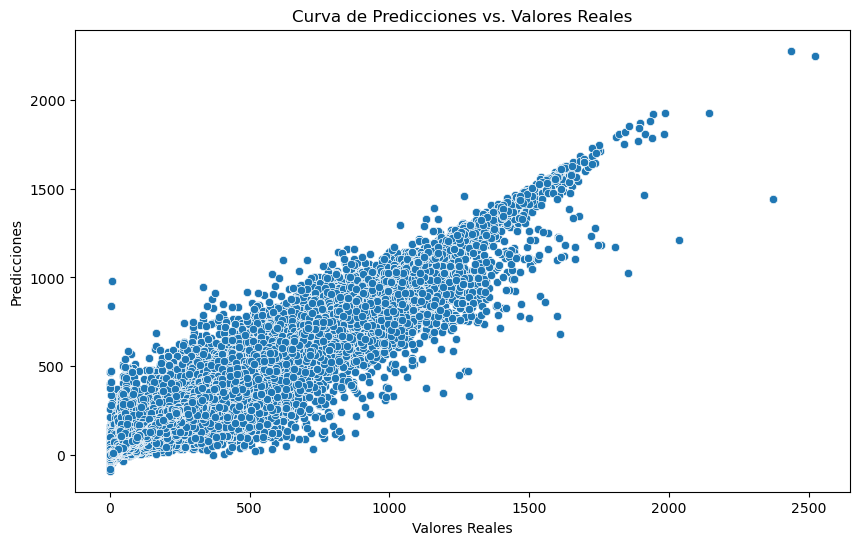

In [9]:
# --------------------------- Evaluación del modelo CON TODOS LOS DATOS ------------------------------------- #
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

importancia_caracteristicas = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print("Importancia de las Características:")
print(importancia_caracteristicas)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Curva de Predicciones vs. Valores Reales")
plt.show()
